<a href="https://colab.research.google.com/github/NarayaniSuresh/CSE340/blob/main/LAB_6_ADABOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# 1) Import the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt



In [50]:

# 2) Load the Dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')



In [51]:
# 3) Combine the Datasets
test_df['Survived'] = -1

# Concatenate train and test datasets
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Check the combined dataset
print(combined_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [52]:
# 4) Check is Null and Describe the dataset
print(train_df.isnull().sum())
print(train_df.describe())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  


In [53]:
# 5) Drop the unnecessary columns from the dataset
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)



In [54]:
# 6) Impute values for the missing NaN values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)



In [55]:
# 7) Check if all the values are not null
print(train_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


In [56]:
# 8) Drop the unnecessary columns from the dataset (if any)
# Drop unnecessary columns
combined_df = combined_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Check the updated dataset
print(combined_df.head())




   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


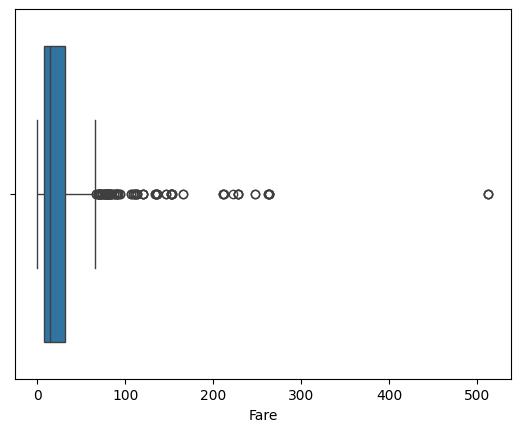

In [57]:
# 9) Finding the outliers and dealt with it
sns.boxplot(data=train_df, x='Fare')
plt.show()

# Dealing with outliers in 'Fare' column by clipping
train_df['Fare'] = train_df['Fare'].clip(upper=train_df['Fare'].quantile(0.99))



In [58]:
# 10) Convert Object type data into Numeric using any Encoder
encoder = LabelEncoder()
train_df['Sex'] = encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = encoder.fit_transform(train_df['Embarked'])



In [59]:
# 11) Convert the data into input and output vectors
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']



In [60]:
# 12) Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [61]:
# 13) Import AdaBoost Classifier and do the Classification and check the accuracy of the model
ada_clf = AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth=1))
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy_ada)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Classifier Accuracy: 0.8100558659217877


In [62]:
# 14) Use Logistic Regression to Check the difference
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_log_reg)



Logistic Regression Accuracy: 0.8100558659217877


<ipython-input-63-b3e18f54f654>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X.columns,palette='viridis')


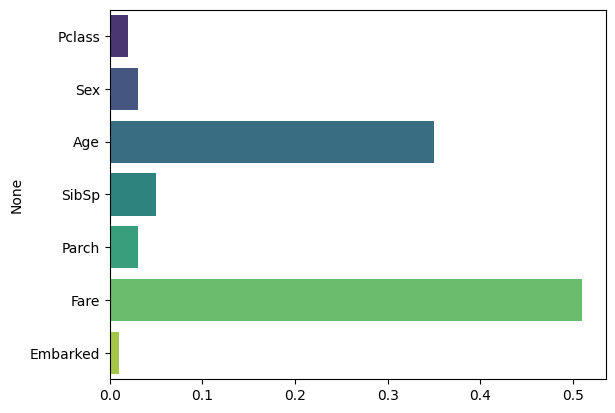

In [63]:
# 15) Calculated the accuracy of your model for predicting survival, you can visualize the results.
# Visualizing feature importance
feature_importance = ada_clf.feature_importances_
sns.barplot(x=feature_importance, y=X.columns,palette='viridis')
plt.legend([], frameon=False)
plt.show()